<p><h2 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">VIDEO GAMES SALES PREDICTION</h2></p>


<p><h2 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">VIDEO GAME SALES PREDICTION USING SUPERVISED ALGORITHMS - Video Game Sales</h2></p>

In [1]:
# importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# reading csv file
dataframe = pd.read_csv('vgsales.csv');

In [4]:
#printing first 5 rows 
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# dataset info and dtypes no need to change
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# shape of dataset
dataframe.shape

(16598, 11)

In [7]:
# handle missing values
print("Missing Values")
dataframe.isnull().sum()

Missing Values


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# fixed year missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
dataframe[['Year']] = imputer.fit_transform(dataframe[['Year']])

In [9]:
dataframe.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [10]:
# handle missing values - publisher column
dataframe.dropna(inplace=True)

In [11]:
print(dataframe.isnull().sum())
print("\nShape of dataset : ", dataframe.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Shape of dataset :  (16540, 11)


<p><h2 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">VISUALIZATION OF DATA AND PREPROCESSING</h2></p>

In [12]:
#Visualization data to get information
#Import library to plotting data
import matplotlib.pyplot as plt
import seaborn as sns
print("Visualization library imported")

Visualization library imported


Total Platform Counts


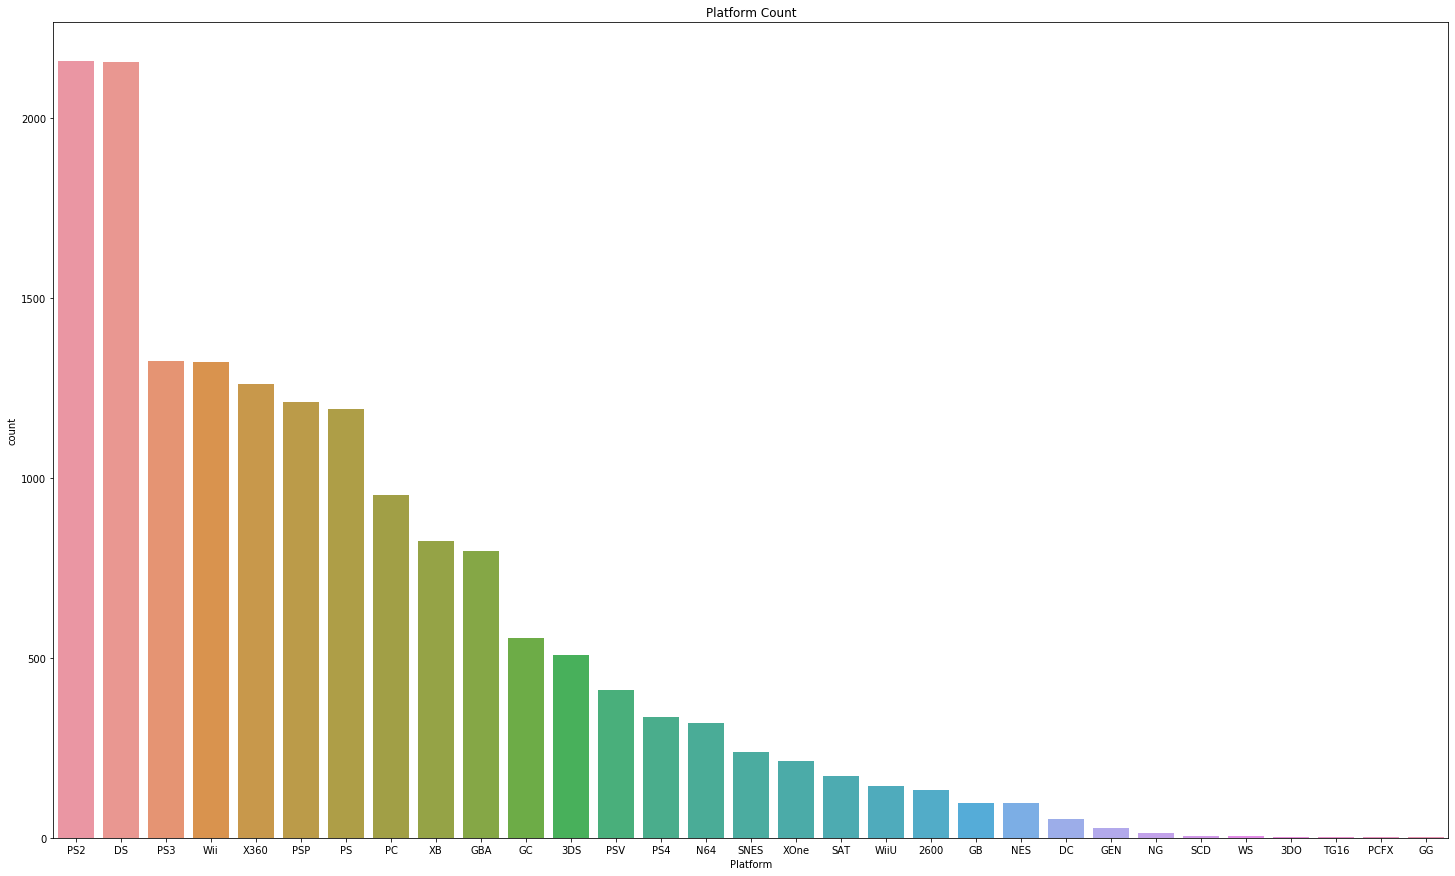

In [13]:
print('Total Platform Counts')


plt.figure(figsize=(25, 15))
plt.xlabel('Platform')
plt.ylabel("Count")
plt.title("Platform Count")
sns.countplot(x='Platform', data=dataframe, order = dataframe['Platform'].value_counts().index)

Total Genre Count


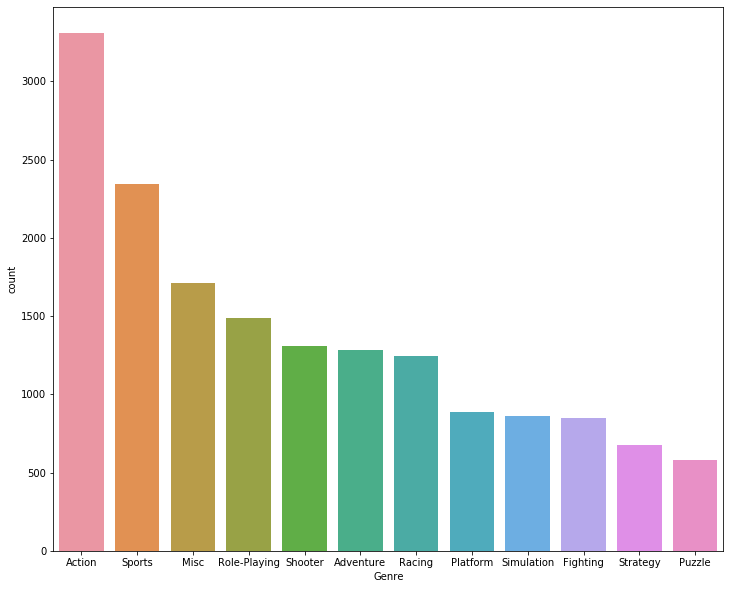

In [14]:
print("Total Genre Count")

plt.figure(figsize=(12, 10))
sns.countplot(x="Genre", data=dataframe, order = dataframe['Genre'].value_counts().index)

Plotting Genre over Global Sales


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

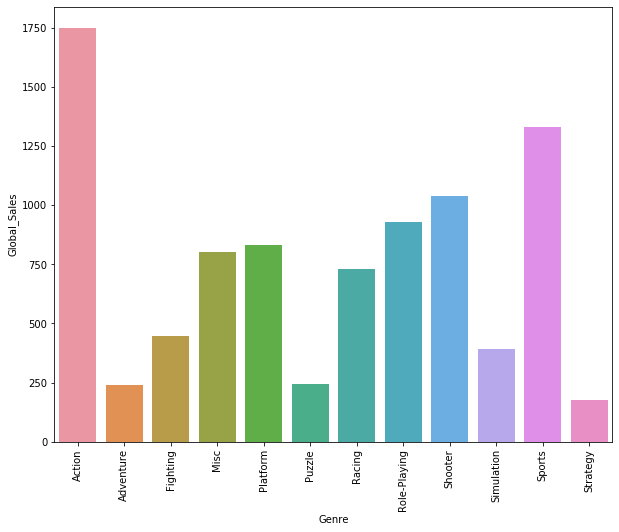

In [15]:
print("Plotting Genre over Global Sales")
data_genre = dataframe.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

Plotting Histogram for Genre with frequency count


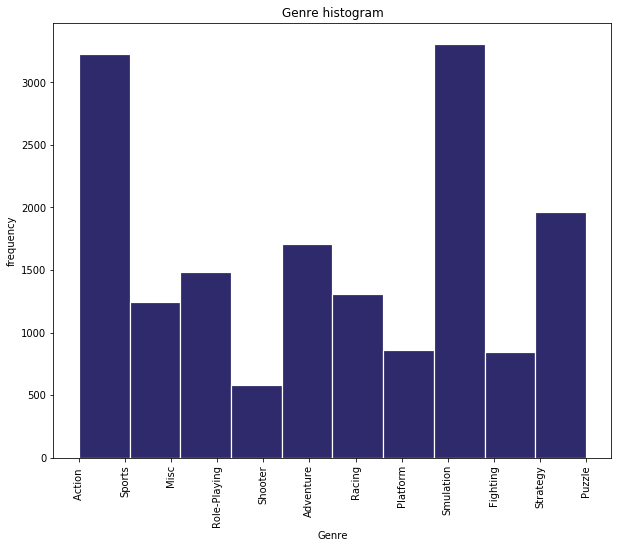

In [16]:
print('Plotting Histogram for Genre with frequency count')
plt.figure(figsize=(10, 8))
plt.hist(dataframe['Genre'],color='#2e2a6b',orientation ='vertical', edgecolor='white', linewidth=1.2)
plt.title('Genre histogram')
plt.xlabel('Genre')
plt.ylabel('frequency')
Genre=('Action ','Sports','Misc','Role-Playing','Shooter','Adventure', 'Racing', 'Platform','Smulation','Fighting','Strategy' , 'Puzzle',)
index=np.arange(len(Genre))
plt.xticks(index, Genre, rotation=90)
plt.show()

Plotting HeatMap


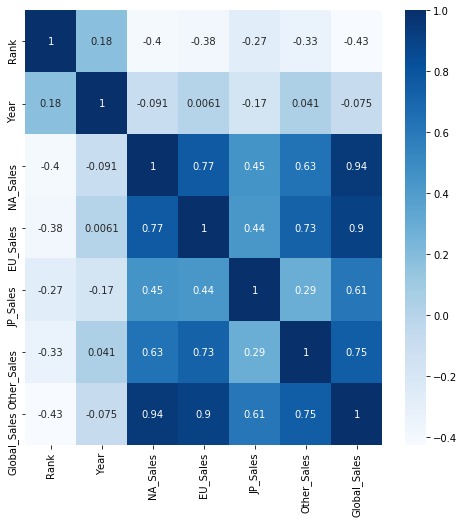

In [17]:
print("Plotting HeatMap")
plt.figure(figsize=(8,8))
sns.heatmap(dataframe.corr(),annot=True, cmap='Blues')
plt.show()

Line Graph grouped by Years over Sales


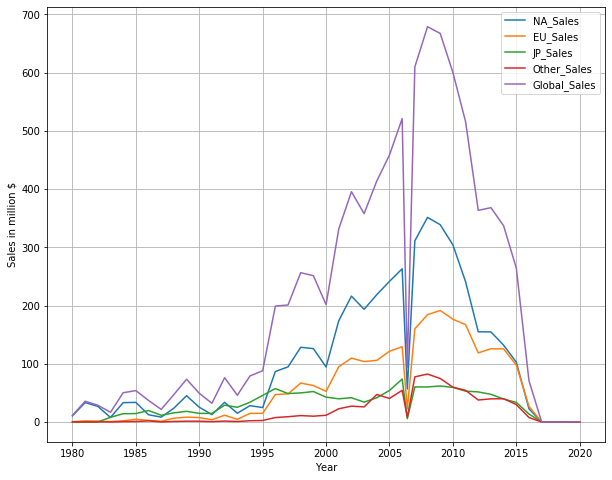

In [18]:
print("Line Graph grouped by Years over Sales")
df = dataframe[['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(by = 'Year').sum()
df.plot.line(figsize=(10,8), grid="on");
plt.xlabel("Year")
plt.ylabel("Sales in million $");

Regional Sales bargraph


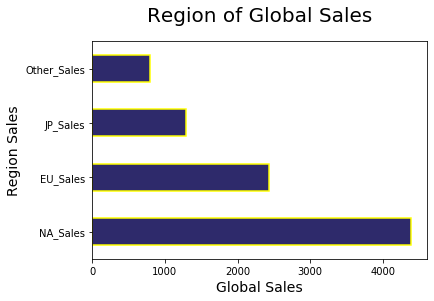

In [19]:
#Since region sales high correlate to global sales, we plot it to know where highest region correlation.
print("Regional Sales bargraph")
dataframe[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().plot(x="Global_Sales", kind="barh", color='#2e2a6b', edgecolor='yellow',linewidth=1.5)
plt.xlabel('Global Sales', fontsize=14)
plt.ylabel('Region Sales', fontsize=14)
plt.title('Region of Global Sales', pad=20, fontsize=20)
plt.show()

<p><h3 style="font-family: 'Roboto', sans-serif; color:#2e2a6b">
    <ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of dataframe) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>
</h3></p>



<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">PREPARING BINNING FOR GLOBAL SALES</h3></p>


In [20]:
print('Binning Function')

Binning Function


In [21]:
# data binning -for categorical value
def binningFunction(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    print(break_points)
    if not labels:
        labels = range(len(cut_points)+1)
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [22]:
# binning global sales
print("max: ",dataframe["Global_Sales"].max(),"\nmin: ",dataframe["Global_Sales"].min(),"\nmean",dataframe["Global_Sales"].mean())

max:  82.74 
min:  0.01 
mean 0.538425634824741


In [23]:
# setting cut point for global sales
cut_points = [0.40,10]
labels = ['Low_Sales',"Avarage_Sales","High_Sales"]
dataframe['Sales_Category_GS'] = binningFunction(dataframe['Global_Sales'], cut_points, labels)

[0.01, 0.4, 10, 82.74]


In [24]:
dataframe['Sales_Category_GS'].value_counts()

Low_Sales        11772
Avarage_Sales     4706
High_Sales          62
Name: Sales_Category_GS, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

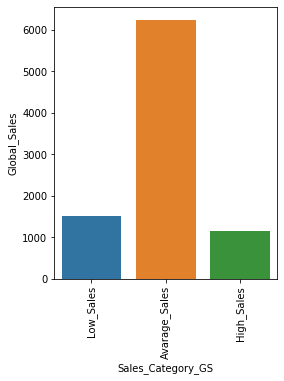

In [25]:
data_cat = dataframe.groupby(by=['Sales_Category_GS'])['Global_Sales'].sum()
data_cat = data_cat.reset_index()
data_cat.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(4, 5))
sns.barplot(x="Sales_Category_GS", y="Global_Sales", data=data_cat)
plt.xticks(rotation=90)

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">PREPARING BINNING FOR NA SALES</h3></p>


In [26]:
# binning global sales
print("max: ",dataframe["NA_Sales"].max(),"\nmin: ",dataframe["NA_Sales"].min(),"\nmean",dataframe["NA_Sales"].mean())

max:  41.49 
min:  0.0 
mean 0.2650792019347233


In [27]:
cut_points = [0.30,5]
labels = ['Low_Sales',"Avarage_Sales","High_Sales"]
dataframe['Sales_Category_NA'] = binningFunction(dataframe['NA_Sales'], cut_points, labels)

[0.0, 0.3, 5, 41.49]


In [28]:
dataframe['Sales_Category_NA'].value_counts()

Low_Sales        13161
Avarage_Sales     3321
High_Sales          58
Name: Sales_Category_NA, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

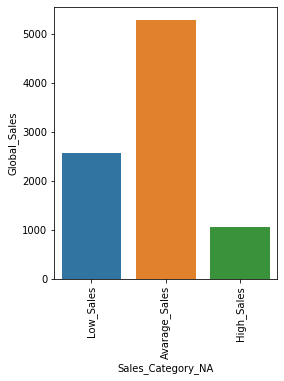

In [29]:
data_cat = dataframe.groupby(by=['Sales_Category_NA'])['Global_Sales'].sum()
data_cat = data_cat.reset_index()
data_cat.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(4, 5))
sns.barplot(x="Sales_Category_NA", y="Global_Sales", data=data_cat)
plt.xticks(rotation=90)

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">PREPARING BINNING FOR EU SALES</h3></p>


In [30]:
# binning global sales
print("max: ",dataframe["EU_Sales"].max(),"\nmin: ",dataframe["EU_Sales"].min(),"\nmean",dataframe["EU_Sales"].mean())

max:  29.02 
min:  0.0 
mean 0.14688331318020234


In [31]:
cut_points = [0.12, 10]
labels = ['Low_Sales',"Avarage_Sales","High_Sales"]
dataframe['Sales_Category_EU'] = binningFunction(dataframe['EU_Sales'], cut_points, labels)

[0.0, 0.12, 10, 29.02]


In [32]:
dataframe['Sales_Category_EU'].value_counts()

Low_Sales        12716
Avarage_Sales     3820
High_Sales           4
Name: Sales_Category_EU, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

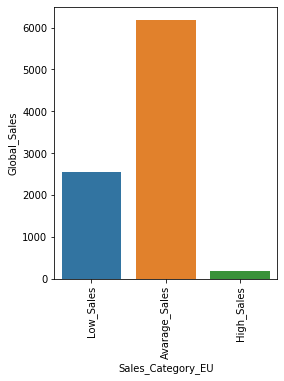

In [33]:
data_cat = dataframe.groupby(by=['Sales_Category_EU'])['Global_Sales'].sum()
data_cat = data_cat.reset_index()
data_cat.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(4, 5))
sns.barplot(x="Sales_Category_EU", y="Global_Sales", data=data_cat)
plt.xticks(rotation=90)

In [34]:
dataframe.iloc[10:14].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Category_GS,Sales_Category_NA,Sales_Category_EU
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,High_Sales,High_Sales,High_Sales
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,High_Sales,High_Sales,Avarage_Sales
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,High_Sales,High_Sales,Avarage_Sales
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,High_Sales,High_Sales,Avarage_Sales


In [35]:
# for all algorithms will accept train test value
algo = ['GB_sales', 'NA_sales', "EU_sales"]
train_set=[]
test_set=[]

In [36]:
#Make cluster data
X = dataframe[['Rank','Genre','Platform','Publisher','Year']].values

In [37]:
gen = dataframe["Genre"].unique()
gen = list(gen)
pltf = dataframe["Platform"].unique()
pltf = list(pltf)
pub = dataframe["Publisher"].unique()
pub = list(pub)

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">ENCODING VALUES FOR X</h3></p>



In [38]:

from sklearn import preprocessing

le_genre = preprocessing.LabelEncoder()
le_genre.fit(gen)
X[:,1] = le_genre.transform(X[:,1]) 


le_pltf = preprocessing.LabelEncoder()
le_pltf.fit(pltf)
X[:,2] = le_pltf.transform(X[:,2])


le_pub = preprocessing.LabelEncoder()
le_pub.fit(pub)
X[:,3] = le_pub.transform(X[:,3]) 

X[0:5]


array([[1, 10, 26, 359, 2006.0],
       [2, 4, 11, 359, 1985.0],
       [3, 6, 26, 359, 2008.0],
       [4, 10, 26, 359, 2009.0],
       [5, 7, 5, 359, 1996.0]], dtype=object)

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">DECISION TREE CLASSIFIER - GLOBAL SALES PREDICTION</h3></p>


In [39]:
# target value
y = dataframe['Sales_Category_GS'].values

In [40]:
# training testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
salestree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
salestree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
# fitting trainning testing
salestree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
# preparing prediction tree
y_pred = salestree.predict(X_test)

In [45]:
train_set.append(salestree.score(X_train, y_train))
test_set.append(salestree.score(X_test, y_test))

In [46]:
print(y_pred[0:6])
print(y_test[0:6])

['Low_Sales' 'Low_Sales' 'Low_Sales' 'Avarage_Sales' 'Low_Sales'
 'Low_Sales']
[Low_Sales, Low_Sales, Low_Sales, Avarage_Sales, Low_Sales, Low_Sales]
Categories (3, object): [Low_Sales < Avarage_Sales < High_Sales]


In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy for Global sales Prediction: ", metrics.accuracy_score(y_test, y_pred))


DecisionTrees's Accuracy for Global sales Prediction:  1.0


In [48]:
print("report of decision tree GLOBAL SALES : \n", metrics.classification_report(y_test , y_pred))


report of decision tree GLOBAL SALES : 
                precision    recall  f1-score   support

Avarage_Sales       1.00      1.00      1.00      1362
   High_Sales       1.00      1.00      1.00        19
    Low_Sales       1.00      1.00      1.00      3581

     accuracy                           1.00      4962
    macro avg       1.00      1.00      1.00      4962
 weighted avg       1.00      1.00      1.00      4962



<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">DECISION TREE CLASSIFIER - NA SALES</h3></p>


In [49]:
y = dataframe['Sales_Category_NA'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
salestree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
salestree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
salestree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
train_set.append(salestree.score(X_train, y_train))
test_set.append(salestree.score(X_test, y_test))

In [55]:
y_pred = salestree.predict(X_test)

In [56]:
print(y_pred[0:6])
print(y_test[0:6])

['Low_Sales' 'Low_Sales' 'Low_Sales' 'Avarage_Sales' 'Low_Sales'
 'Low_Sales']
[Low_Sales, Low_Sales, Low_Sales, Avarage_Sales, Low_Sales, Low_Sales]
Categories (3, object): [Low_Sales < Avarage_Sales < High_Sales]


In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy for NA sales Prediction: ", metrics.accuracy_score(y_test, y_pred))


DecisionTrees's Accuracy for NA sales Prediction:  0.9195888754534461


In [58]:
print("report of decision tree NA SALES : \n", metrics.classification_report(y_test , y_pred))


report of decision tree NA SALES : 
                precision    recall  f1-score   support

Avarage_Sales       0.74      0.90      0.81       957
   High_Sales       0.80      0.71      0.75        17
    Low_Sales       0.98      0.93      0.95      3988

     accuracy                           0.92      4962
    macro avg       0.84      0.84      0.84      4962
 weighted avg       0.93      0.92      0.92      4962



<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">DECISION TREE CLASSIFIER - EU SALES PREDICTION</h3></p>


In [59]:
y = dataframe['Sales_Category_EU'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# controls randomness

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
salestree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
salestree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
salestree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_pred = salestree.predict(X_test)

In [65]:
train_set.append(salestree.score(X_train, y_train))
test_set.append(salestree.score(X_test, y_test))

In [66]:
print(y_pred[0:6])
print(y_test[0:6])

['Low_Sales' 'Low_Sales' 'Low_Sales' 'Avarage_Sales' 'Low_Sales'
 'Low_Sales']
[Low_Sales, Low_Sales, Low_Sales, Avarage_Sales, Low_Sales, Low_Sales]
Categories (3, object): [Low_Sales < Avarage_Sales < High_Sales]


In [67]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy for EU sales Prediction: ", metrics.accuracy_score(y_test, y_pred))


DecisionTrees's Accuracy for EU sales Prediction:  0.9066908504635228


In [68]:
print("report of decision tree EU SALES : \n", metrics.classification_report(y_test , y_pred))


report of decision tree EU SALES : 
                precision    recall  f1-score   support

Avarage_Sales       0.78      0.81      0.79      1099
    Low_Sales       0.95      0.93      0.94      3863

     accuracy                           0.91      4962
    macro avg       0.86      0.87      0.87      4962
 weighted avg       0.91      0.91      0.91      4962



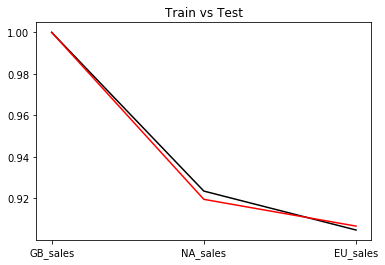

In [69]:
plt.title('Train vs Test')
plt.plot(algo, train_set, color='black',label='train data')
plt.plot(algo, test_set, color='red', label='test data')

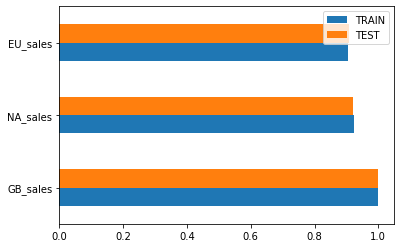

In [70]:
index = algo
df = pd.DataFrame({'TRAIN': train_set,
                   'TEST': test_set}, index=index)
ax = df.plot.barh()

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">REGRESSION ALGORITHMS - PREDICTING CONTINUOUS VALUE FOR GLOBAL SALES</h3></p>
It uses a decision tree to go from observations about an item to conclusions about the item's target value. 


In [71]:
algo = ['TreeReg', 'LinReg']
train_set=[]
test_set=[]

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">PREDICTION WITH DECISION TREE REGRESSER</h3></p>


In [72]:
X = dataframe.iloc[:, 7:10]

y = dataframe['Global_Sales'].values

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test)


In [75]:
train_set.append(dtr.score(X_train, y_train))
test_set.append(dtr.score(X_test, y_test))

In [76]:
print("Training Accuracy :", dtr.score(X_train, y_train))
print("Testing Accuracy :", dtr.score(X_test, y_test))
print(r2_score(y_test,y_preddtr))

Training Accuracy : 0.9932034309576397
Testing Accuracy : 0.7488245328868401
0.7488245328868401


<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">PREDICTION WITH LINEAR REGRESSION</h3></p>


In [77]:
#Hierarchical Clustering Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

In [78]:
train_set.append(lr.score(X_train, y_train))
test_set.append(lr.score(X_test, y_test))


In [79]:
print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Training Accuracy : 0.9102045018888574
Testing Accuracy : 0.846397012788343
0.846397012788343


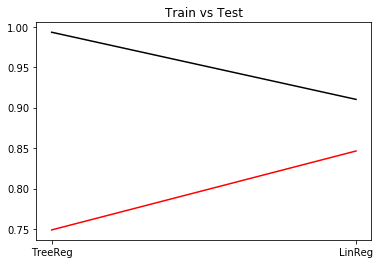

In [80]:
plt.title('Train vs Test')
plt.plot(algo, train_set,color='black',label='train data')
plt.plot(algo, test_set,color='red', label='test data')

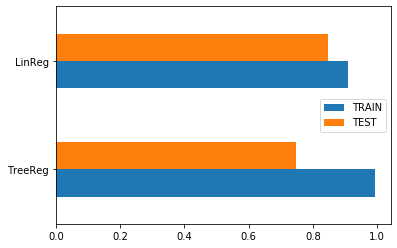

In [81]:
index = algo
df = pd.DataFrame({'TRAIN': train_set,
                   'TEST': test_set}, index=index)
ax = df.plot.barh()

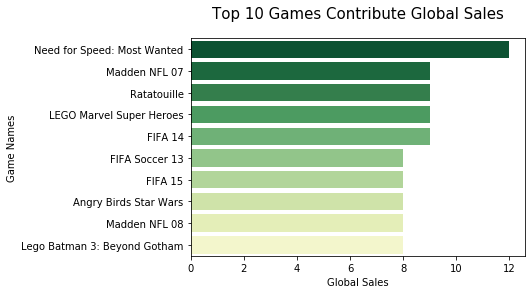

In [82]:
import seaborn as sns
#Plot top 10 games that most selled in global.
games = dataframe.groupby('Name')['Global_Sales'].count().sort_values(ascending = False).head(10)
sns.barplot(x=games.values,y=games.index, palette='YlGn_r')
plt.xlabel('Global Sales')
plt.ylabel('Game Names')
plt.title('Top 10 Games Contribute Global Sales', pad=20, fontsize=15)
plt.show()

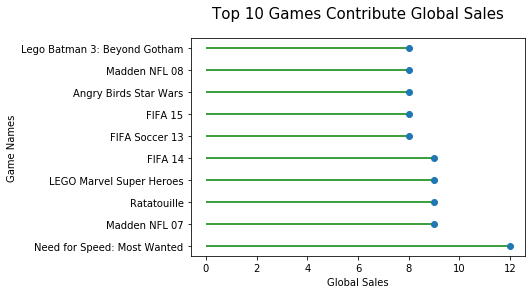

In [83]:
#Plot top 10 games that most selled in global.

games=dataframe.groupby('Name')['Global_Sales'].count().sort_values(ascending = False).head(10)

my_range=range(0,len(games.index))

plt.hlines(y=games.index, xmin=0, xmax=games.values, color='green')
plt.plot(games.values, my_range, "o")

plt.xlabel('Global Sales')
plt.ylabel('Game Names')
plt.title('Top 10 Games Contribute Global Sales', pad=20, fontsize=15)
plt.show()

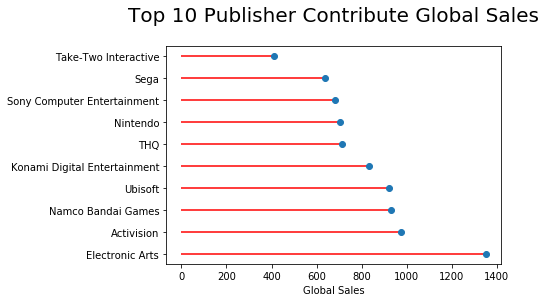

In [84]:
#Plot 10 publisher that most contribute to global sales. The best one is Electronic Art publisher.
contri = dataframe.groupby('Publisher')['Global_Sales'].count().sort_values(ascending=False).head(10)

my_range=range(0,len(contri.index))

plt.hlines(y=contri.index, xmin=0, xmax=contri.values, color='red')
plt.plot(contri.values, my_range, "o")

plt.xlabel('Global Sales')
plt.title('Top 10 Publisher Contribute Global Sales', pad=25, fontsize=20)
plt.show()

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">DECISION TREE CLASSIFICATINWITH MULTIPLE TARGET CATEGORIES</h3></p>



In [85]:
print("Binning - Prediction with higher categorical value created by binning")

Binning - Prediction with higher categorical value created by binning


In [86]:
print("Binning Trial")
bin = [0.001,1,10,30,55,np.inf]
tags = ['very low','low',"avarage",'high','very high']
dataframe['Multicat_GS'] = pd.cut(dataframe['Global_Sales'],bin,labels=tags)
dataframe['Multicat_GS'].value_counts

Binning Trial


<bound method IndexOpsMixin.value_counts of 0        very high
1             high
2             high
3             high
4             high
           ...    
16593     very low
16594     very low
16595     very low
16596     very low
16597     very low
Name: Multicat_GS, Length: 16540, dtype: category
Categories (5, object): [very low < low < avarage < high < very high]>

In [87]:
#Make cluster data
X = dataframe[['Rank','Genre','Platform','Publisher','Year']].values

In [88]:
gen = dataframe["Genre"].unique()
gen = list(gen)
pltf = dataframe["Platform"].unique()
pltf = list(pltf)
pub = dataframe["Publisher"].unique()
pub = list(pub)

<p><h3 style="font-family: 'Roboto', sans-serif;color:#2e2a6b;">ENCODING VALUES FOR X</h3></p>



In [89]:

from sklearn import preprocessing

le_genre = preprocessing.LabelEncoder()
le_genre.fit(gen)
X[:,1] = le_genre.transform(X[:,1]) 


le_pltf = preprocessing.LabelEncoder()
le_pltf.fit(pltf)
X[:,2] = le_pltf.transform(X[:,2])


le_pub = preprocessing.LabelEncoder()
le_pub.fit(pub)
X[:,3] = le_pub.transform(X[:,3]) 

X[0:5]


array([[1, 10, 26, 359, 2006.0],
       [2, 4, 11, 359, 1985.0],
       [3, 6, 26, 359, 2008.0],
       [4, 10, 26, 359, 2009.0],
       [5, 7, 5, 359, 1996.0]], dtype=object)

In [90]:
# target value
y = dataframe['Multicat_GS'].values

In [91]:
# training testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
salestree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
salestree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
# fitting trainning testing
salestree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
# preparing prediction tree
y_pred = salestree.predict(X_test)

In [96]:
print(y_pred[0:6])
print(y_test[0:6])

['very low' 'very low' 'very low' 'very low' 'very low' 'very low']
[very low, very low, very low, very low, very low, very low]
Categories (5, object): [very low < low < avarage < high < very high]


In [97]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy for Global sales Prediction with 5 category: ", metrics.accuracy_score(y_test, y_pred))


DecisionTrees's Accuracy for Global sales Prediction with 5 category:  0.9995969367190649


In [98]:
print("report of decision tree  Global sales Prediction with 5 category: : \n", metrics.classification_report(y_test , y_pred))


report of decision tree  Global sales Prediction with 5 category: : 
               precision    recall  f1-score   support

     avarage       1.00      0.89      0.94        19
        high       0.00      0.00      0.00         0
         low       1.00      1.00      1.00       578
    very low       1.00      1.00      1.00      4365

    accuracy                           1.00      4962
   macro avg       0.75      0.72      0.74      4962
weighted avg       1.00      1.00      1.00      4962



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
!pip install pydot
import pydotplus
import pydot
from six import StringIO
from sklearn import tree
import matplotlib.image as mpimg

Decision Tree Output


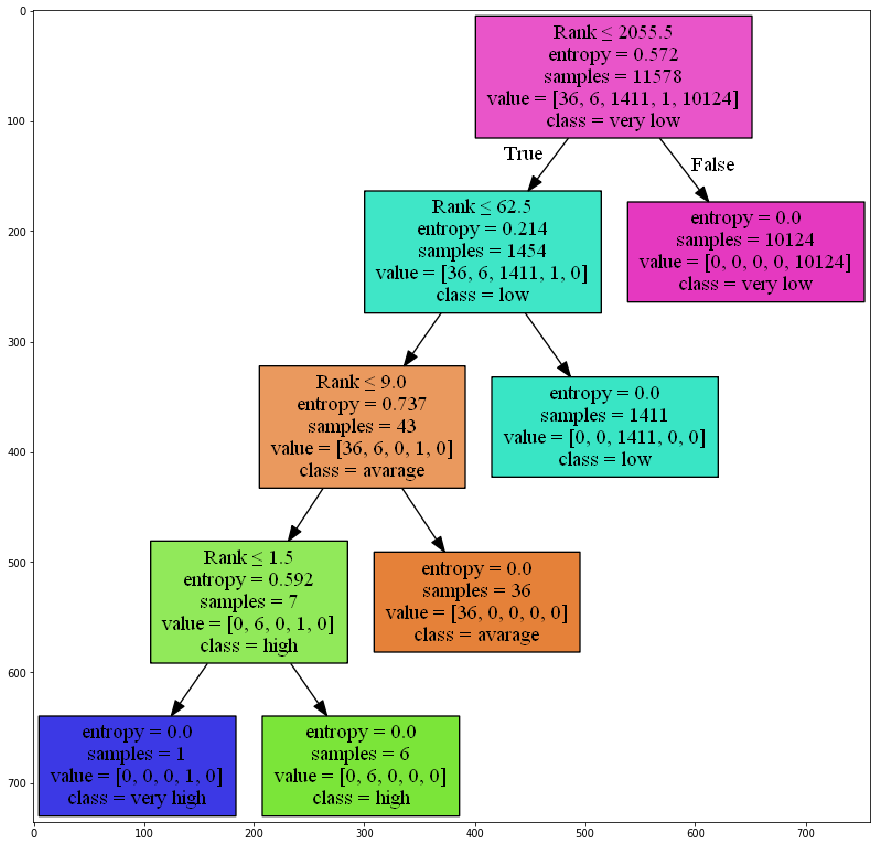

In [100]:
print("Decision Tree Output")
dot_data = StringIO()
filename = "miniProject.png"
featureNames = [dataframe.columns[0],dataframe.columns[2],dataframe.columns[4],dataframe.columns[5],dataframe.columns[3]]
targetNames = dataframe['Multicat_GS'].unique().tolist()
out=tree.export_graphviz(salestree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 15))
plt.imshow(img,interpolation='nearest')